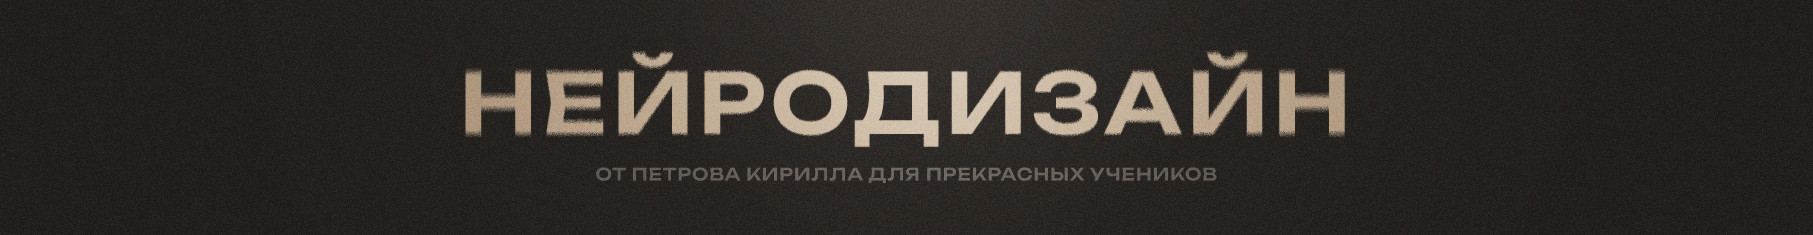

#1. УСТАНОВКА | Нажми " ▶ "

In [ ]:
# БАЗОВЫЙ КОД

!apt -y update -qq
!apt -y install -qq aria2
!pip install -q torch==1.13.1+cu117 torchvision==0.14.1+cu117 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q https://github.com/camenduru/stable-diffusion-webui-colab/releases/download/0.0.16/xformers-0.0.16+814314d.d20230118-cp38-cp38-linux_x86_64.whl
!pip install -q huggingface-hub==0.11.0 -U

!wget https://raw.githubusercontent.com/camenduru/stable-diffusion-webui-scripts/main/run_n_times.py -O /kaggle/working/stable-diffusion-webui/scripts/run_n_times.py

#SD
!git clone -b v2.0 https://github.com/camenduru/stable-diffusion-webui
!git clone https://github.com/Mikubill/sd-webui-controlnet /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet
!git clone https://github.com/petrovgold/SDtunels /kaggle/working/stable-diffusion-webui/extensions/tunnels

#Дополнения
!git clone https://github.com/s0md3v/sd-webui-roop /kaggle/working/stable-diffusion-webui/extensions/sd-webui-roop
!git clone https://github.com/camenduru/openpose-editor /kaggle/working/stable-diffusion-webui/extensions/openpose-editor
!git clone https://github.com/CookieMeowie/adetailer2 /kaggle/working/stable-diffusion-webui/extensions/adetailer
!git clone https://huggingface.co/Bingsu/adetailer /kaggle/working/stable-diffusion-webui/adetailer
!git clone https://github.com/pharmapsychotic/clip-interrogator-ext /kaggle/working/stable-diffusion-webui/extensions/clip-interrogator-ext
!git clone https://github.com/some9000/StylePile /kaggle/working/stable-diffusion-webui/extensions/StylePile

!git clone https://huggingface.co/embed/negative /kaggle/working/stable-diffusion-webui/embeddings/negative

#Апскейлеры
!curl -Lo /kaggle/working/stable-diffusion-webui/models/ESRGAN/4x_NMKD-Siax_200k.pth https://huggingface.co/gemasai/4x_NMKD-Siax_200k/
!curl -Lo /kaggle/working/stable-diffusion-webui/models/ESRGAN/4x_NMKD-Superscale-SP_178000_G.pth https://huggingface.co/gemasai/4x_NMKD-Superscale-SP_178000_G/
!curl -Lo /kaggle/working/stable-diffusion-webui/models/ESRGAN/4x-UltraSharp.pth https://huggingface.co/lokCX/4x-Ultrasharp/

%cd /kaggle/working/stable-diffusion-webui

!sed -i -e 's/numpy==1.23.3/numpy==1.21.6/g' requirements_versions.txt
!sed -i -e 's/blendmodes==2022/blendmodes==2021/g' requirements_versions.txt
!sed -i -e 's/fastapi==0.90.1/fastapi==0.89.1/g' requirements_versions.txt
!sed -i -e '''/    prepare_environment()/a\    os.system\(f\"""sed -i -e ''\"s/dict()))/dict())).cuda()/g\"'' /kaggle/working/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/ldm/util.py""")''' /kaggle/working/stable-diffusion-webui/launch.py

!npm install -g localtunnel
import subprocess
import threading
import time
import socket
def iframe_thread(port):
    while True:
        time.sleep(0.5)
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        result = sock.connect_ex(('127.0.0.1', port))
        if result == 0:
            break
        sock.close()
    p = subprocess.Popen(["lt", "--port", "{}".format(port)], stdout=subprocess.PIPE)
    for line in p.stdout:
        print(line.decode(), end='')
threading.Thread(target=iframe_thread, daemon=True, args=(7860,)).start()

#2. ВЫБЕРИ МОДЕЛЬ | Сотри # или укажи ссылку

In [ ]:
#RealisticVision5
!curl -Lo /kaggle/working/stable-diffusion-webui/models/Stable-diffusion/RealisticVision5.safetensors https://civitai.com/api/download/models/105674

#EpicRealism
#!curl -Lo /kaggle/working/stable-diffusion-webui/models/Stable-diffusion/EpicRealism.safetensors https://civitai.com/api/download/models/143906

#Deliberate3-NEW
#!curl -Lo /kaggle/working/stable-diffusion-webui/models/Stable-diffusion/Deliberate3.safetensors https://civitai.com/api/download/models/156110

#Reliberate2
#!curl -Lo /kaggle/working/stable-diffusion-webui/models/Stable-diffusion/Reliberate2.safetensors https://civitai.com/api/download/models/135166

#ReV-Animated
#!curl -Lo /kaggle/working/stable-diffusion-webui/models/Stable-diffusion/ReV-Animated.safetensors https://civitai.com/api/download/models/46846

#DreamShaper8
#!curl -Lo /kaggle/working/stable-diffusion-webui/models/Stable-diffusion/DreamShaper8.safetensors https://civitai.com/api/download/models/128713

#Другая модель
#!curl -Lo /kaggle/working/stable-diffusion-webui/models/Stable-diffusion/NAME.safetensors https://civitai.com/api/download/models/NUMBER

#3. ControlNet | Сотри решетки

In [ ]:
# Удали решетку вначале, чтобы скачать необходимые модели для ControlNet
# Canny
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_canny-fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_canny-fp16.safetensors
# Inpaint
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_inpaint_fp16.safetensors
# Depth
#!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_depth-fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_depth-fp16.safetensors
# Hed
#!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_hed-fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_hed-fp16.safetensors
# Mlsd
#!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_mlsd-fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_mlsd-fp16.safetensors
# NormalMap
#!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_normal-fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_normal-fp16.safetensors
# OpenPose
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_openpose-fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_openpose-fp16.safetensors
# Scribble
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_scribble-fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_scribble-fp16.safetensors
# LineArt
#!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_lineart_fp16.safetensors
# Seg
#!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_seg-fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_seg-fp16.safetensors

#4. Старт / Перезапуск

In [ ]:
!python launch.py --share --xformers --enable-insecure-extension-access --gradio-queue

# Петров Кирилл ВК: [_@petrov_gold_](https://vk.com/petrov_gold)
